In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 하이퍼 패러미터 설정
MY_BATCH = 64
MY_EPOCH = 300

In [3]:
# 0. 데이터 불러오기
X, Y = load_diabetes(return_X_y=True, as_frame=True)

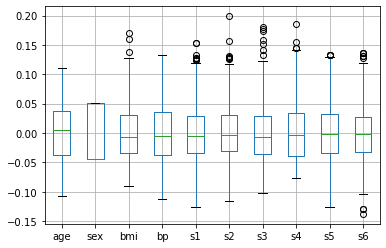

In [4]:
# 1. 입력 데이터 시각화
X.boxplot()
plt.show()

In [5]:
# 2. 출력 데이터 스케일링
scaler = StandardScaler()
Y = scaler.fit_transform(Y.values.reshape(-1, 1))

In [6]:
temp = pd.DataFrame(Y)
temp.describe()

,0
count,4.420000e+02
mean,-1.009750e-16
std,1.001133e+00
min,-1.650961e+00
25%,-8.458263e-01
50%,-1.510729e-01
75%,7.709362e-01
max,2.517559e+00


In [7]:
# 3. 학습용, 평가용 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [8]:
# 4. 인공신경망 구축
model = Sequential()

model.add(Dense(200, activation="relu", input_dim=10))
model.add(Dense(1000, activation="relu"))

model.add(Dense(1, activation="linear"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2200      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              201000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 204,201
Trainable params: 204,201
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 5. 기타 환경 설정
model.compile(optimizer="sgd", loss="mse", metrics=["acc"])

In [10]:
# 6. 학습 실행 및 학습 내역 저장
hist = model.fit(X_train, Y_train, batch_size=MY_BATCH, epochs=MY_EPOCH, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/300
6/6 [==============================] - 0s 19ms/step - loss: 0.9709 - acc: 0.0000e+00 - val_loss: 1.0884 - val_acc: 0.0000e+00
Epoch 2/300
6/6 [==============================] - 0s 3ms/step - loss: 0.9631 - acc: 0.0000e+00 - val_loss: 1.0815 - val_acc: 0.0000e+00
Epoch 3/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9551 - acc: 0.0000e+00 - val_loss: 1.0725 - val_acc: 0.0000e+00
Epoch 4/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9483 - acc: 0.0000e+00 - val_loss: 1.0668 - val_acc: 0.0000e+00
Epoch 5/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9411 - acc: 0.0000e+00 - val_loss: 1.0624 - val_acc: 0.0000e+00
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9347 - acc: 0.0000e+00 - val_loss: 1.0569 - val_acc: 0.0000e+00
Epoch 7/300
6/6 [==============================] - 0s 2ms/step - loss: 0.9292 - acc: 0.0000e+00 - val_loss: 1.0516 - val_acc: 0.0000e+00
Epoch 8/300
6/6 [=======================

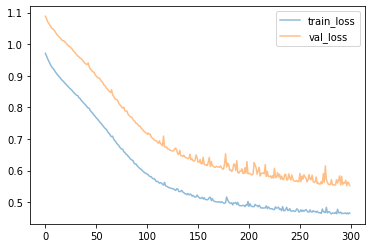

In [17]:
# 7. 학습 내역 시각화
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")

plt.legend()

plt.show()

In [12]:
# 8. 평가 진행
loss, acc = model.evaluate(X_test, Y_test)
print("loss:", loss)

4/4 [==============================] - 0s 499us/step - loss: 0.5521 - acc: 0.0000e+00
loss: 0.5520548224449158


In [13]:
# 9. 예측 실행
Y_pred = model.predict(X_test)

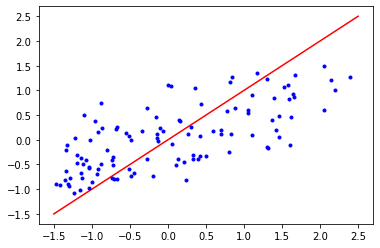

In [14]:
# 10. 예측 결과 시각화
plt.plot([-1.5, 2.5], [-1.5, 2.5], "r")
plt.plot(Y_test, Y_pred, "b.")
plt.show()

In [15]:
# 11. 정규화 되돌리기
inversed_test = scaler.inverse_transform(Y_test)
inversed_pred = scaler.inverse_transform(Y_pred)

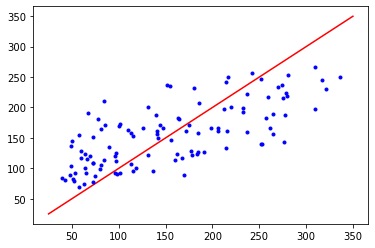

In [16]:
# 12. 예측 결과 시각화
plt.plot([25, 350], [25, 350], "r")
plt.plot(inversed_test, inversed_pred, "b.")
plt.show()

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
r2

0.4945930236110525

In [22]:
from scipy.stats import pearsonr
r = pearsonr(Y_test.flatten(), Y_pred.flatten())
r

(0.7075173306946059, 3.935764676777697e-18)

In [23]:
r[0] ** 2

0.5005807732332203